In [17]:
import numpy as np
import matplotlib.pyplot as plt
import copy

# Poisson Equations

<font  face=Times color=darkblue size=3> In this notebook, we discuss computational methods to solve Poisson equation: $$\Delta \phi (\vec x_{\vec r})=-\frac{1}{\epsilon_0}\rho(\vec x_{\vec r}).$$ After discretization through the centered three-point formula in each direction, it has a form: $$\phi (\vec x_{\vec r})=\frac{1}{2d}\sum_1^d[\phi (\vec x_{\vec r+h\vec e_i})+\phi (\vec x_{\vec r-h\vec e_i})]+\frac{h^2}{2d\epsilon_0}\rho(\vec x_{\vec r}).$$
    For simplicity, we set the time spacing $h=1$, $\epsilon_0=1$ and we consider $N\times N$ two-dimensional cases($d=2$ and including the boundary) with the initial condition and charge density defined as below. We use Dirichlet boundary conditions: $\phi(\vec{x}_\vec{r}) =0$ for $\vec{x}_\vec{r}\in \partial V$.

In [18]:
### you can change the initial conditions in this cell for all methods below, including N and the charge_density

N=60 #2 of N are boundaries
d=2
epsilon=1
h=1
#initial condition
potential_initial=np.zeros((N,N)) #this includes boundary=0
charge_density=np.ones((N,N))   #uniform distribution for introduction of the methods

## Jacobi Relaxation

<font  face=Times color=darkblue size=3> We use the discretized formula to iteratively compute new $\phi$ and replace the old values by new ones until $\delta \phi={\rm max}_{\vec r}|\phi^{\rm new}(\vec x_{\vec r})-\phi(\vec x_{\vec r})|$ is no larger than the specified bound which is defined below.

In [19]:
def jacobi_relaxation(bound_jr):
    iterations=0
    potential_here=copy.deepcopy(potential_initial)
    while True:
        iterations+=1
        potential_new=copy.deepcopy(potential_here)  #set phi_new
        for i in range(1,N-1):
            for j in range(1,N-1): # simulate all N-2*N-2 sites using discretized poisson equation, no simulation for boundary 
                left_index=i-h
                right_index=i+h
                up_index=j+h
                down_index=j-h
                potential_new[i,j]=(1/(2*d))*(potential_new[i,up_index]+potential_new[i,down_index]+potential_new[right_index,j]
                                              +potential_new[left_index,j])+(h**2/(2*d*epsilon))*charge_density[i,j] 
        max_delta=np.max(np.abs(potential_new-potential_here)) # compute delta_phi
        if max_delta <= bound_jr:
            break
        else:
            potential_here=copy.deepcopy(potential_new)
        #print(iterations,max_delta)
    return iterations,potential_new

In [20]:
iterations_jr,potential_jr=jacobi_relaxation(0.0001)

In [21]:
iterations_jr #iterations_needed

3175

In [22]:
potential_jr[0:N,0:N]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 2.41368067, 4.32736195, ..., 4.32737808, 2.41368904,
        0.        ],
       [0.        , 4.32736195, 7.95707388, ..., 7.95710605, 4.32737864,
        0.        ],
       ...,
       [0.        , 4.32737808, 7.95710605, ..., 7.9571358 , 4.32739352,
        0.        ],
       [0.        , 2.41368904, 4.32737864, ..., 4.32739352, 2.41369676,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

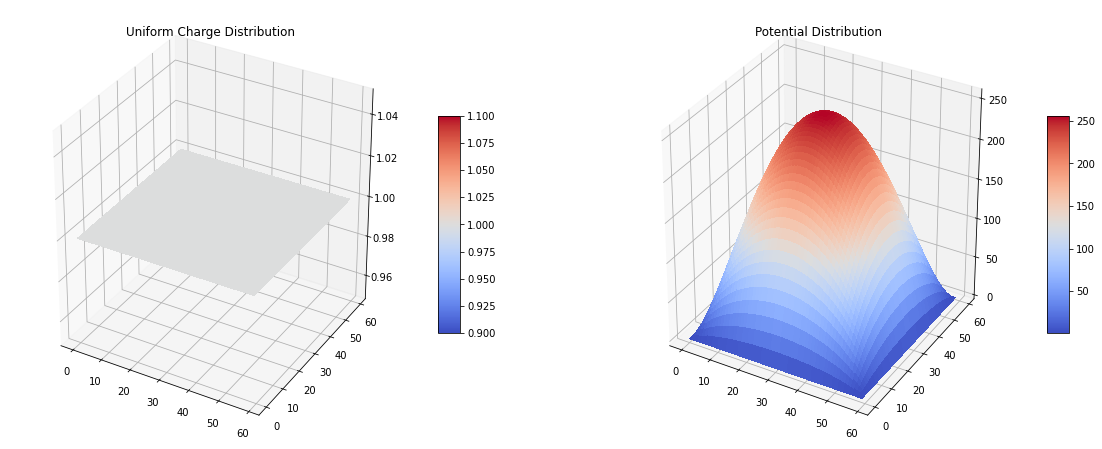

In [23]:
from matplotlib import cm
fig_jr=plt.figure(figsize=(20,8))
ax1_jr = fig_jr.add_subplot(1, 2, 1, projection='3d')
X1 = np.arange(0,N)
Y1 = np.arange(0,N)
X1, Y1 = np.meshgrid(X1, Y1)
Z1_jr = charge_density[0:N,0:N]
surf1_jr = ax1_jr.plot_surface(X1, Y1, Z1_jr, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax1_jr.set_title('Uniform Charge Distribution')
fig_jr.colorbar(surf1_jr, shrink=0.5, aspect=10)

ax3_jr = fig_jr.add_subplot(1, 2, 2, projection='3d')
Z3_jr = potential_jr[0:N,0:N]
surf3_jr = ax3_jr.plot_surface(X1, Y1, Z3_jr, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax3_jr.set_title('Potential Distribution')
fig_jr.colorbar(surf3_jr, shrink=0.5, aspect=10)


## Gauss-Seidel Relaxation

<font  face=Times color=darkblue size=3> In Jacobi Relaxation, we need to store two arrays of potential, including the new and old ones. A simple modification is made here, that is, we update every lattice point which results a lattice with both old and new points.

In [24]:
def gauss_seidel_relaxation(bound_here):
    iterations=0
    potential_new=copy.deepcopy(potential_initial)
    while True:
        iterations+=1
        max_delta=0
        for i in range(1,N-1):
            for j in range(1,N-1): # simulate all N-2*N-2 sites using discretized poisson equation, no simulation for boundary 
                left_index=i-h
                right_index=i+h
                up_index=j+h
                down_index=j-h
                potential_point_new=(1/(2*d))*(potential_new[i,up_index]+potential_new[i,down_index]+potential_new[right_index,j]
                                              +potential_new[left_index,j])+(h**2/(2*d*epsilon))*charge_density[i,j] #new point
                max_delta=max(max_delta,np.abs(potential_new[i,j]-potential_point_new))  #delta_phi
                potential_new[i,j]=potential_point_new #update point
        if max_delta <= bound_here:
            break
        #print(iterations,max_delta)
    return iterations,potential_new

In [25]:
iterations_gs,potential_gs=gauss_seidel_relaxation(0.0001)

In [26]:
iterations_gs

3175

In [27]:
potential_gs[0:N,0:N]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 2.41368067, 4.32736195, ..., 4.32737808, 2.41368904,
        0.        ],
       [0.        , 4.32736195, 7.95707388, ..., 7.95710605, 4.32737864,
        0.        ],
       ...,
       [0.        , 4.32737808, 7.95710605, ..., 7.9571358 , 4.32739352,
        0.        ],
       [0.        , 2.41368904, 4.32737864, ..., 4.32739352, 2.41369676,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

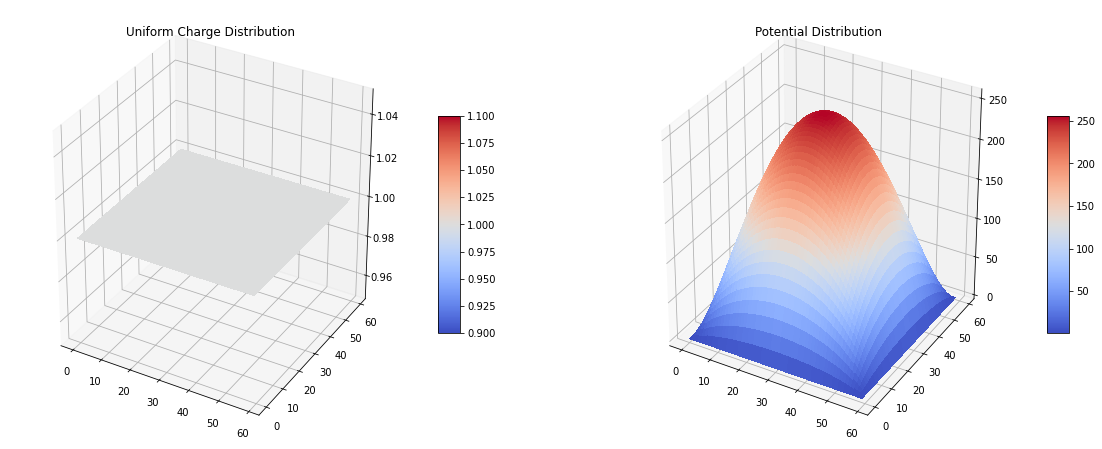

In [28]:
fig_gs=plt.figure(figsize=(20,8))
ax1_gs = fig_gs.add_subplot(1, 2, 1, projection='3d')
X1 = np.arange(0,N)
Y1 = np.arange(0,N)
X1, Y1 = np.meshgrid(X1, Y1)
Z1_gs = charge_density[0:N,0:N]
surf1_gs = ax1_gs.plot_surface(X1, Y1, Z1_gs, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax1_gs.set_title('Uniform Charge Distribution')
fig_gs.colorbar(surf1_gs, shrink=0.5, aspect=10)

ax3_gs = fig_gs.add_subplot(1, 2, 2, projection='3d')
Z3_gs = potential_gs[0:N,0:N]
surf3_gs = ax3_gs.plot_surface(X1, Y1, Z3_gs, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax3_gs.set_title('Potential Distribution')
fig_gs.colorbar(surf3_gs, shrink=0.5, aspect=10)

## Successive Overrelaxation (SOR)

<font  face=Times color=darkblue size=3> To further fasten the Gauss-Seidel relaxation, we modify the update step as follows: $$\phi (\vec x_{\vec r})\rightarrow (1-w)\phi (\vec x_{\vec r})+w[ \frac{1}{2d}\sum_1^d[\phi (\vec x_{\vec r+h\vec e_i})+\phi (\vec x_{\vec r-h\vec e_i})]+\frac{h^2}{2d\epsilon_0}\rho(\vec x_{\vec r})].$$ A relaxation parameter $w$ is introduced, and the Gauss Seidel corresponds to $w=1$. We now try to use an overrelaxation parameter $w>1$ and this method is only stable for $w<2$. In particular, there is an optimal value $w_{\rm opt}$. In the case of a $N_x \times N_y$ ($N_x=N_y=N-2$) lattice with Dirichlet boundary conditions, $$w_{\rm opt}=\frac{2}{1+\sqrt{1-r^2}},\ r=0.5(\cos{(\pi/N_x)}+\cos{(\pi/N_y)}).$$

In [34]:
def sor(bound_here):
    iterations=0
    potential_new=copy.deepcopy(potential_initial)
    rhere=np.cos(np.pi/(N-2))
    w_opt=2/(1+np.sqrt(1-rhere**2))
    print(w_opt)
    while True:
        iterations+=1
        max_delta=0
        for i in range(1,N-1):
            for j in range(1,N-1): # simulate all N-2*N-2 sites using discretized poisson equation, no simulation for boundary 
                left_index=i-h
                right_index=i+h
                up_index=j+h
                down_index=j-h
                potential_point_new=(1-w_opt)*potential_new[i,j]+w_opt*((1/(2*d))*(potential_new[i,up_index]
                                                                                   +potential_new[i,down_index]
                                                                                   +potential_new[right_index,j]
                                              +potential_new[left_index,j])+(h**2/(2*d*epsilon))*charge_density[i,j]) #new point
                max_delta=max(max_delta,np.abs(potential_new[i,j]-potential_point_new))  #delta_phi
                potential_new[i,j]=potential_point_new #update point
        if max_delta <= bound_here:
            break
        #print(iterations,max_delta)
    return iterations,potential_new

In [35]:
iterations_sor,potential_sor=sor(0.0001)

1.8972831604175024


In [36]:
iterations_sor

166

In [37]:
potential_sor[0:N,0:N]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 2.41376895, 4.32753966, ..., 4.32757378, 2.41378694,
        0.        ],
       [0.        , 4.32753966, 7.95743147, ..., 7.95749656, 4.327574  ,
        0.        ],
       ...,
       [0.        , 4.32757378, 7.95749656, ..., 7.95750197, 4.32757661,
        0.        ],
       [0.        , 2.41378694, 4.327574  , ..., 4.32757661, 2.41378831,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

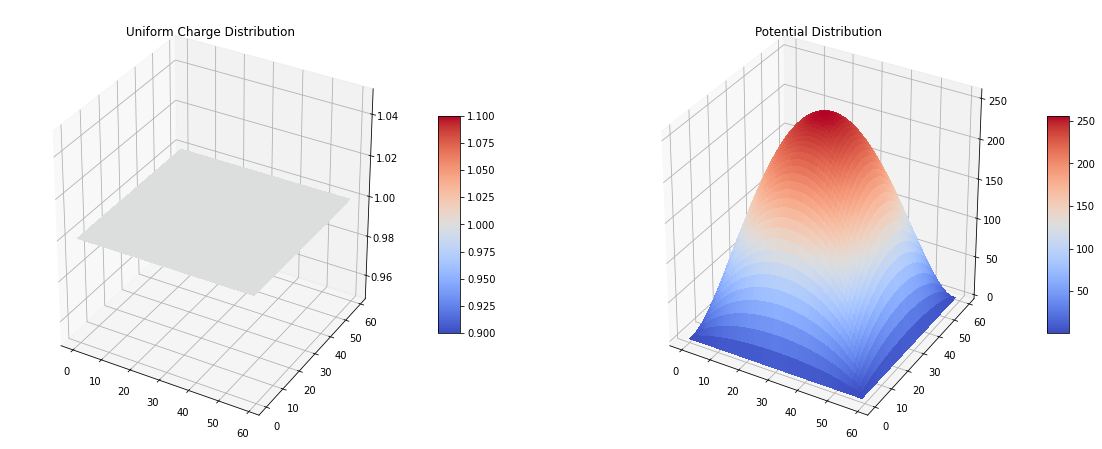

In [38]:
fig_sor=plt.figure(figsize=(20,8))
ax1_sor = fig_sor.add_subplot(1, 2, 1, projection='3d')
X1 = np.arange(0,N)
Y1 = np.arange(0,N)
X1, Y1 = np.meshgrid(X1, Y1)
Z1_sor = charge_density[0:N,0:N]
surf1_sor = ax1_sor.plot_surface(X1, Y1, Z1_sor, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax1_sor.set_title('Uniform Charge Distribution')
fig_sor.colorbar(surf1_sor, shrink=0.5, aspect=10)

ax3_sor = fig_sor.add_subplot(1, 2, 2, projection='3d')
Z3_sor = potential_sor[0:N,0:N]
surf3_sor = ax3_sor.plot_surface(X1, Y1, Z3_sor, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax3_sor.set_title('Potential Distribution')
fig_sor.colorbar(surf3_sor, shrink=0.5, aspect=10)

<font  face=Times color=darkblue size=3> With the same bound, we can see faster convergence.

## Matrix-Formulation

<font  face=Times color=darkblue size=3> The discretization of Poisson equation leads to aa set of linear algebraic equations, which can be expressed as $$A\vec \phi = \vec b,$$ 
  where,$$\vec\phi=\left(
    \begin{array} {c}
    \phi(\vec x_{r_0})\\
    \phi(\vec x_{r_1})\\
    \vdots\\
    \phi(\vec x_{r_{N_{\rm site}-1}})
    \end{array}
    \right),
    $$ ${\rm N_{site}}=(N-2)^2$, $\vec b$ is set by the boundary conditions($b_i=\frac{h^2}{\epsilon_0}\rho_i+\sum\phi_{\rm nearest\ boundary}$) and the charge distribution, and $A$ is given by distribution of Laplace operator ($A(i,i)=2*d$ and $A(i,j)=1$ only if the points are neighbors).
    <br><br> Below we build the matrices.

In [ ]:
### written for 2d

N_site=(N-2)**2
A_mat=np.zeros((N_site,N_site))
for i in range(N-2):
    for j in range(N-2):
        neighbor_list_row=[]
        if j==0:
            neighbor_list_row.append(j+1)
        elif j==N-3:
            neighbor_list_row.append(j-1)
        else:
            neighbor_list_row.append(j-1)
            neighbor_list_row.append(j+1)
        neighbor_list_col=[]
        if i==0:
            neighbor_list_col.append(i+1)
        elif i==N-3:
            neighbor_list_col.append(i-1)
        else:
            neighbor_list_col.append(i-1)
            neighbor_list_col.append(i+1)
        for it in neighbor_list_row:
            A_mat[i*(N-2)+j,i*(N-2)+it]=-1
        for it in neighbor_list_col:
            A_mat[i*(N-2)+j,it*(N-2)+j]=-1
        A_mat[i*(N-2)+j,i*(N-2)+j]=2*d

In [ ]:
A_mat

array([[ 4., -1.,  0., ...,  0.,  0.,  0.],
       [-1.,  4., -1., ...,  0.,  0.,  0.],
       [ 0., -1.,  4., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  4., -1.,  0.],
       [ 0.,  0.,  0., ..., -1.,  4., -1.],
       [ 0.,  0.,  0., ...,  0., -1.,  4.]])

In [ ]:
b_mat=np.zeros(N_site)   # each site would be the same as we use uniform charge distribution and the boundary is 0
for i in range(N-2):
    for j in range(N-2):
        value_here=charge_density[i+1,j+1]*(h**2)/epsilon
        if i==0:
            value_here+=potential_initial[i+1-1,j+1]
        if i==N-3:
            value_here+=potential_initial[i+1+1,j+1]
        if j==0:
            value_here+=potential_initial[i+1,j+1-1]
        if j==N-3:
            value_here+=potential_initial[i+1,j+1+1]
        b_mat[i*(N-2)+j]=value_here

In [ ]:
b_mat

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

## Gauss Elimination

<font  face=Times color=darkblue size=3> We first use the standard procejure to solve the equations which you should be familiar with: Firstly use forward elimination to make $A$ an upper triangular matrix $\tilde A$ with $\vec{\tilde b}$, and then do back substitution to obtain $\phi$.

In [ ]:
potential_gauss=np.zeros(N_site) 
#foward 
b_mat_gauss=copy.deepcopy(b_mat)
A_mat_gauss=copy.deepcopy(A_mat)
for j in range(N_site-1):
    for i in range(j+1,N_site):
        f_here=-A_mat_gauss[i,j]/A_mat_gauss[j,j]
        for ind_k in range(j,N_site):
            A_mat_gauss[i,ind_k]=A_mat_gauss[i,ind_k]+f_here*A_mat_gauss[j,ind_k]
        b_mat_gauss[i]=b_mat_gauss[i]+f_here*b_mat_gauss[j]

#back
potential_gauss[-1]=b_mat_gauss[-1]/A_mat_gauss[-1,-1]
for i in reversed(range(N_site-1)):
    sum_here=0
    for j in range(i+1,N_site):
        sum_here+=A_mat_gauss[i,j]*potential_gauss[j]
    potential_gauss[i]=(b_mat_gauss[i]-sum_here)/A_mat_gauss[i,i]

In [ ]:
potential_gauss #result

array([ 1.69178057,  2.88356113,  3.77285451,  4.45219911,  4.97164849,
        5.36116745,  5.63973174,  5.81945405,  5.90760295,  5.90760295,
        5.81945405,  5.63973174,  5.36116745,  4.97164849,  4.45219911,
        3.77285451,  2.88356113,  1.69178057,  2.88356113,  5.06960946,
        6.75565778,  8.06429347,  9.07322738,  9.83328957, 10.37830547,
       10.73048149, 10.90335482, 10.90335482, 10.73048149, 10.37830547,
        9.83328957,  9.07322738,  8.06429347,  6.75565778,  5.06960946,
        2.88356113,  3.77285451,  6.75565778,  9.11587369, 10.9760896 ,
       12.42367798, 13.520458  , 14.30971909, 14.82081162, 15.07198001,
       15.07198001, 14.82081162, 14.30971909, 13.520458  , 12.42367798,
       10.9760896 ,  9.11587369,  6.75565778,  3.77285451,  4.45219911,
        8.06429347, 10.9760896 , 13.30051326, 15.12493693, 16.51514536,
       17.51930125, 18.17106591, 18.49177358, 18.49177358, 18.17106591,
       17.51930125, 16.51514536, 15.12493693, 13.30051326, 10.97

In [ ]:
# use inverse matrix
np.dot(np.linalg.inv(A_mat),b_mat.reshape(N_site,1))

array([[ 1.69178057],
       [ 2.88356113],
       [ 3.77285451],
       [ 4.45219911],
       [ 4.97164849],
       [ 5.36116745],
       [ 5.63973174],
       [ 5.81945405],
       [ 5.90760295],
       [ 5.90760295],
       [ 5.81945405],
       [ 5.63973174],
       [ 5.36116745],
       [ 4.97164849],
       [ 4.45219911],
       [ 3.77285451],
       [ 2.88356113],
       [ 1.69178057],
       [ 2.88356113],
       [ 5.06960946],
       [ 6.75565778],
       [ 8.06429347],
       [ 9.07322738],
       [ 9.83328957],
       [10.37830547],
       [10.73048149],
       [10.90335482],
       [10.90335482],
       [10.73048149],
       [10.37830547],
       [ 9.83328957],
       [ 9.07322738],
       [ 8.06429347],
       [ 6.75565778],
       [ 5.06960946],
       [ 2.88356113],
       [ 3.77285451],
       [ 6.75565778],
       [ 9.11587369],
       [10.9760896 ],
       [12.42367798],
       [13.520458  ],
       [14.30971909],
       [14.82081162],
       [15.07198001],
       [15

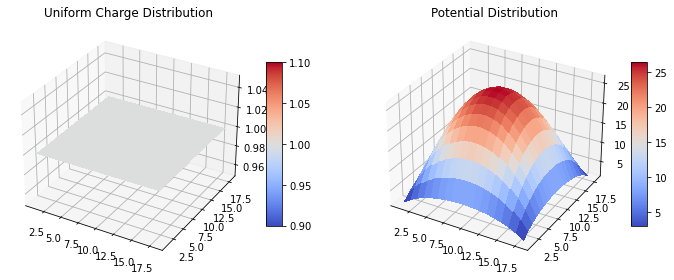

In [ ]:
fig_gauss=plt.figure(figsize=(12,6))
ax1_gauss = fig_gauss.add_subplot(1, 2, 1, projection='3d')
X1 = np.arange(1,N-1)
Y1 = np.arange(1,N-1)
X1, Y1 = np.meshgrid(X1, Y1)
Z1_gauss = charge_density[1:N-1,1:N-1]
surf1_gauss = ax1_gauss.plot_surface(X1, Y1, Z1_gauss, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax1_gauss.set_title('Uniform Charge Distribution')
fig_gauss.colorbar(surf1_gauss, shrink=0.5, aspect=10)

ax3_gauss = fig_gauss.add_subplot(1, 2, 2, projection='3d')
Z3_gauss = potential_gauss.reshape(N-2,N-2)
surf3_gauss = ax3_gauss.plot_surface(X1, Y1, Z3_gauss, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax3_gauss.set_title('Potential Distribution')
fig_gauss.colorbar(surf3_gauss, shrink=0.5, aspect=10)

In [ ]:
#comparison with iterative methods
np.max(np.abs(potential_sor[1:N-1,1:N-1].reshape(N_site)-potential_gauss.reshape(N_site)))

3.715932181336257e-05

<font  face=Times color=darkblue size=3> Now we have the solution the same as that if we directly use ${\rm inv}(A)\cdot b$ (for quick confirmation), and the deviations of iterative solutions from this are comparable to the bound we set.

### Pivoting

<font  face=Times color=darkblue size=3> There is a major problem with this procejure on a computer: After a few iterations, some of the $A_{ii}$ might be (almost) zero, also due to roundoff errors. We would then divide by very small numbers (or evern 0), which can leads to large inaccuracies.
    <br><br>
    The solution to this is to use pivoting in each step of the elimination procejure:
    <br>
    This means that one exchanges rows (and/or columns) before each elimination step, in order to use the largest matrix element (absolute values) for the division. These correspond to an exchange of rows/columns and/or re-indexing of the $x_i$ and $b_i$.  
    <br>One however needs to perform an appropiate bookkeeping in order to keep track of these transformation. To ease this bookkeeping, one often performs only a partial pivoting: one looks only within the current column for the largest matrix element, and thus only exchanges rows.
    <br><br>In order to have a meaningful comparison of the matrix elements between different rows, one furthermore performs an initial rescaling, so that the absolute value of the largest matrix element in each row becomes 1.
    <br><br>
    Below we show the algorithm for the elimination with partial pivoting (to backsubstitue, remember also to used the kept new indices), and comparison with simple elimation using a simple readable example.

In [ ]:
# simple elimination
# Note that these are written for square matrix A only, for Nx not equal Ny, need some change of index
def elimination_without_pivoting(mata,matb):
    N_here=len(matb)
    for j in range(N_here-1):
        for i in range(j+1,N_here):
            f_here=-mata[i,j]/mata[j,j]
            for ind_k in range(j,N_here):
                mata[i,ind_k]=mata[i,ind_k]+f_here*mata[j,ind_k]
                if mata[ind_k,ind_k]==0:
                    print(mata)
                    return "fails"
            matb[i]=matb[i]+f_here*matb[j]
    return mata,matb

In [ ]:
def elimination_partial_pivoting(mata,matb):
    N_here=len(matb)
    for i in range(N_here): #rescaling
        max_num=np.max(mata[i])
        min_num=np.min(mata[i])
        if np.abs(max_num) > np.abs(min_num):
            mata[i]=mata[i]/max_num
            matb[i]=matb[i]/max_num
        else:
            mata[i]=mata[i]/min_num
            matb[i]=matb[i]/min_num
    vectorv=np.arange(N_here) #bookkeeping
    for j in range(0,N_here-1):
        indp=np.argmax(np.abs(mata[j:,j]))+j
        if indp!=j:   #exchange
            j_tobe=copy.deepcopy(vectorv[indp])
            vectorv[indp]=copy.deepcopy(vectorv[j])
            vectorv[j]=copy.deepcopy(j_tobe)
        for i in range(j+1,N_here):
            f_here=-mata[vectorv[i],j]/mata[vectorv[j],j]
            for indk in range(j,N_here):
                mata[vectorv[i],indk]=mata[vectorv[i],indk]+f_here*mata[vectorv[j],indk]
            matb[vectorv[i]]=matb[vectorv[i]]+f_here*matb[vectorv[j]]
    return mata,matb,vectorv
def pivoted_backsubstitution(mata,matb,vec):
    x=np.zeros_like(matb)
    x[-1]=matb[vec[-1]]/mata[vec[-1],-1]
    for i in reversed(range(len(matb)-1)):
        sum_here=0
        for j in range(i+1,len(matb)):
            sum_here+=mata[vec[i],j]*x[j]
        x[i]=(matb[vec[i]]-sum_here)/mata[vec[i],i]
    return x

In [ ]:
#easy example

### without pivoting!

example_A=np.array([[4.0,-2.,2.],[-2.,1.,3.],[2.,-2.,2.]])
example_b=np.ones(3) #does not matter
print(elimination_without_pivoting(example_A,example_b))

[[ 4. -2.  2.]
 [ 0.  0.  3.]
 [ 2. -2.  2.]]
fails


<font  face=Times color=darkblue size=3> We can see that, without pivoting, the elimination method fails here.

In [ ]:
### with partial pivoting!
mata_pp,matb_pp,indices_pp=elimination_partial_pivoting(example_A,example_b)
print('eliminated A and b:',mata_pp,matb_pp)
print('result of x:',pivoted_backsubstitution(mata_pp,matb_pp,indices_pp))
print('results if directly use inv(A)b:',np.dot(np.linalg.inv(example_A),example_b.reshape(3,1)).reshape(3))

eliminated A and b: [[ 1.  -0.5  0.5]
 [ 0.   0.   1. ]
 [ 0.   0.5 -0.5]] [ 0.25        0.33333333 -0.25      ]
result of x: [ 0.         -0.16666667  0.33333333]
results if directly use inv(A)b: [ 0.         -0.16666667  0.33333333]


<font  face=Times color=darkblue size=3> With partial pivoting, we avoided the error.

## $LU$ Decomposition

<font  face=Times color=darkblue size=3>Performing the Gauss elimination, we obtain a triangular matrix $$\tilde A=MA,\ {\rm where} M=M^{(N_{\rm site}-2)}\cdots M^{(1)}M^{(0)}$$ with Frobenius matrices $M^{(j)}$. (i) the diagonal matrix elements $=1$, and (ii) the matrix elements below the diagonal in the $j$-th column are equal to the values of $f$s used in the $j$-th Gauss elimination step. Therefore, $$A=M^{-1}\cdot\tilde A=L\cdot U$$ is the product of the lower triangular matrix $L$ and upper triangular matrix $U$.
    <br><br>
    Since $A\vec\phi=LU\vec\phi=L(U\vec\phi)=\vec b$, we first solve triangular system $L\vec y=\vec b$ using forward substitution, obtaining $\vec y$, and then solve $U\vec \phi=\vec y$ using back substitution. 
    <br><br>
    A clever algorithm by Crout to calculate $LU$ instead of Gauss elimination: Crout fixes $L_{ii}=1$ and then calculate the other elements successively as :
    <br><br> For $j=0,1,\dots,n-1$ do: $$U_{ij}=A_{ij}\sum_{k=0}^{i-1}L_{ik}U_{kj},\ \ i=0,\dots,j$$
    $$L_{ij}=\frac{1}{U_{jj}}[A_{ij}-\sum_{k=0}^{j-1}L_{ik}U_{kj}],\ \ i=j+1,\dots,N_{\rm site}-1$$

In [ ]:
b_mat_lu=copy.deepcopy(b_mat)   #original b
l_mat_lu=np.zeros((N_site,N_site)) # to be decided
u_mat_lu=np.zeros((N_site,N_site)) #directly use the matrix we got in Gauss elimination
y_mat_lu=np.zeros(N_site)
A_mat_lu=copy.deepcopy(A_mat) #original A


In [ ]:
l_mat_lu=np.eye(N_site)
for j in range(N_site):
    for i in range(0,j+1):
        sum_u=0
        if i>0:
            for indk in range(0,i):
                sum_u+=l_mat_lu[i,indk]*u_mat_lu[indk,j]
        u_mat_lu[i,j]=A_mat_lu[i,j]-sum_u
    for i in range(j+1,N_site):
        sum_l=0
        if j>0:
            for indk in range(0,j):
                sum_l+=l_mat_lu[i,indk]*u_mat_lu[indk,j]
        l_mat_lu[i,j]=(A_mat_lu[i,j]-sum_l)/u_mat_lu[j,j]

In [ ]:
y_mat_lu[0]=b_mat_lu[0]/l_mat_lu[0,0]
for i in range(1,N_site):
    sum_here=0
    for j in range(i):
        sum_here+=l_mat_lu[i,j]*y_mat_lu[j]
    y_mat_lu[i]=(b_mat_lu[i]-sum_here)/l_mat_lu[i,i]

In [ ]:
potential_lu=np.zeros(N_site)
potential_lu[-1]=y_mat_lu[-1]/u_mat_lu[-1,-1]
for i in reversed(range(0,N_site-1)):
    sum_here=0
    for j in range(i+1,N_site):
        sum_here+=u_mat_lu[i,j]*potential_lu[j]
    potential_lu[i]=(y_mat_lu[i]-sum_here)/u_mat_lu[i,i]

In [ ]:
potential_lu # result

array([ 1.69178057,  2.88356113,  3.77285451,  4.45219911,  4.97164849,
        5.36116745,  5.63973174,  5.81945405,  5.90760295,  5.90760295,
        5.81945405,  5.63973174,  5.36116745,  4.97164849,  4.45219911,
        3.77285451,  2.88356113,  1.69178057,  2.88356113,  5.06960946,
        6.75565778,  8.06429347,  9.07322738,  9.83328957, 10.37830547,
       10.73048149, 10.90335482, 10.90335482, 10.73048149, 10.37830547,
        9.83328957,  9.07322738,  8.06429347,  6.75565778,  5.06960946,
        2.88356113,  3.77285451,  6.75565778,  9.11587369, 10.9760896 ,
       12.42367798, 13.520458  , 14.30971909, 14.82081162, 15.07198001,
       15.07198001, 14.82081162, 14.30971909, 13.520458  , 12.42367798,
       10.9760896 ,  9.11587369,  6.75565778,  3.77285451,  4.45219911,
        8.06429347, 10.9760896 , 13.30051326, 15.12493693, 16.51514536,
       17.51930125, 18.17106591, 18.49177358, 18.49177358, 18.17106591,
       17.51930125, 16.51514536, 15.12493693, 13.30051326, 10.97

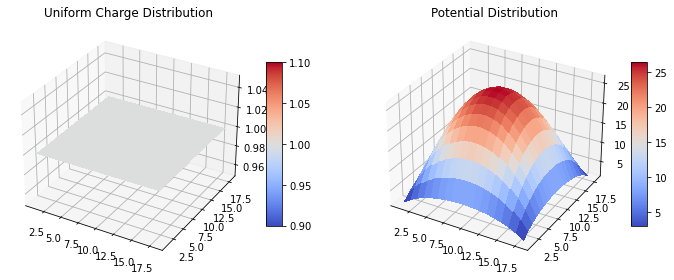

In [ ]:
fig_lu=plt.figure(figsize=(12,6))
ax1_lu = fig_lu.add_subplot(1, 2, 1, projection='3d')
X1 = np.arange(1,N-1)
Y1 = np.arange(1,N-1)
X1, Y1 = np.meshgrid(X1, Y1)
Z1_lu = charge_density[1:N-1,1:N-1]
surf1_lu = ax1_lu.plot_surface(X1, Y1, Z1_lu, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax1_lu.set_title('Uniform Charge Distribution')
fig_lu.colorbar(surf1_lu, shrink=0.5, aspect=10)

ax3_lu = fig_lu.add_subplot(1, 2, 2, projection='3d')
Z3_lu = potential_lu.reshape(N-2,N-2)
surf3_lu = ax3_lu.plot_surface(X1, Y1, Z3_lu, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax3_lu.set_title('Potential Distribution')
fig_lu.colorbar(surf3_gauss, shrink=0.5, aspect=10)

<font  face=Times color=darkblue size=3> Again, we get the same result.

## Conjugate Gradient Method

<font  face=Times color=darkblue size=3> For a symmetric positive-definite $n\times n$ matrix $A$, and a set of equations $A\vec x=\vec b$, we can define
    $$f(\vec x)=\frac{1}{2}\vec x\cdot A\vec x-\vec b\vec x,$$
    so that the minimum of $f$ is a solution to the system of equations. One way to find the minimum is the method of steepest descent with an arbitrary $\vec x_0$. Then the next point is $\vec x_1=\vec x_0+\lambda_0\vec r_0,$ with $\vec r_0=-\nabla f(\vec x_0)=-A\vec x_0+\vec b$, and with $\frac{d}{d\lambda_0}f(\vec x_0+\lambda_0\vec r_0)=0\ \Rightarrow\ \lambda_0=\frac{\vec r_0\cdot\vec r_0}{\vec r_0\cdot A\vec r_0}.$ Continue the iteration until $|\vec r_k|<\epsilon$.
   <br> 
    To minimize the steps, there is a way to choose the direction at $\vec x_1$ such that the gradient keeps vanishing along the previous direction $\vec r_0$. This implies not only $\vec r_0\perp\nabla f(\vec x_1)$, but also $\vec r_0\perp\nabla f(\vec x_1+\lambda_1\vec r_1)\ \Rightarrow\ \vec r_0\cdot A\vec r_1=0$.
    Such vectors $\vec r_0$ and $\vec r_1$ are called A-conjugare vectors.
    <br><br>
    To have explicit construction by Hestens and Stiefel:
    $$\vec r_0=\vec g_0=-\nabla f(\vec x_0)$$
    $$\vec x_{k+1}=\vec x_k+\lambda_k\vec r_k,\ \ \lambda_k=\frac{\vec g_k\cdot\vec g_k}{\vec r_k\cdot A\vec r_k}$$
    $$\vec g_{k+1}=\vec g_k-\lambda_k\cdot A\vec r_k$$
    $$\vec r_{k+1}=\vec g_{k+1}+\frac{\vec g_{k+1}\cdot\vec g_{k+1}}{\vec g_k\cdot\vec g_k}\vec r_k.$$

In [ ]:
A_mat_cg=copy.deepcopy(A_mat)
b_mat_cg=copy.deepcopy(b_mat)
potential_cg=np.zeros(N_site)

In [ ]:
r_cg=g_cg=-np.dot(A_mat_cg,potential_cg.reshape(N_site,1))+b_mat_cg.reshape(N_site,1)

In [ ]:
bound_cg=0.0001
iter_cg=0
while True:
    iter_cg+=1
    lambda_cg=np.dot(g_cg.reshape(1,N_site),g_cg)/np.dot(r_cg.reshape(1,N_site),np.dot(A_mat_cg,r_cg))
    potential_cg=potential_cg.reshape(N_site,1)+lambda_cg*r_cg
    g_cg_new=g_cg-lambda_cg*np.dot(A_mat_cg,r_cg)
    r_cg=g_cg_new+(np.dot(g_cg_new.reshape(1,N_site),g_cg_new)/np.dot(g_cg.reshape(1,N_site),g_cg))*r_cg
    if np.linalg.norm(r_cg)<bound_cg:
        break
    else:
        g_cg=copy.deepcopy(g_cg_new)

In [ ]:
potential_cg

array([[ 1.69178062],
       [ 2.88355986],
       [ 3.77285252],
       [ 4.45219898],
       [ 4.97165313],
       [ 5.36117047],
       [ 5.63973373],
       [ 5.81945271],
       [ 5.90759798],
       [ 5.90759798],
       [ 5.81945271],
       [ 5.63973373],
       [ 5.36117047],
       [ 4.97165313],
       [ 4.45219898],
       [ 3.77285252],
       [ 2.88355986],
       [ 1.69178062],
       [ 2.88355986],
       [ 5.06960672],
       [ 6.7556551 ],
       [ 8.06429421],
       [ 9.07323115],
       [ 9.83329536],
       [10.37830905],
       [10.7304794 ],
       [10.90334975],
       [10.90334975],
       [10.7304794 ],
       [10.37830905],
       [ 9.83329536],
       [ 9.07323115],
       [ 8.06429421],
       [ 6.7556551 ],
       [ 5.06960672],
       [ 2.88355986],
       [ 3.77285252],
       [ 6.7556551 ],
       [ 9.1158697 ],
       [10.97608886],
       [12.42367953],
       [13.52046154],
       [14.30972078],
       [14.82081258],
       [15.07197776],
       [15

In [ ]:
iter_cg

26

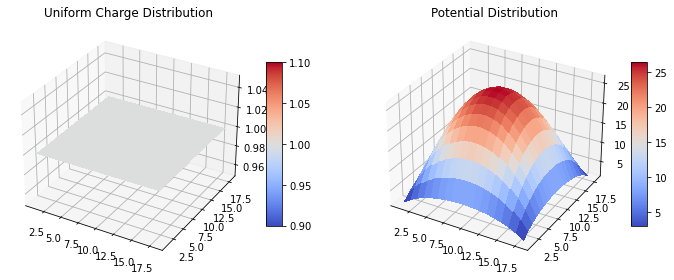

In [ ]:
fig_cg=plt.figure(figsize=(12,6))
ax1_cg = fig_cg.add_subplot(1, 2, 1, projection='3d')
X1 = np.arange(1,N-1)
Y1 = np.arange(1,N-1)
X1, Y1 = np.meshgrid(X1, Y1)
Z1_cg = charge_density[1:N-1,1:N-1]
surf1_cg = ax1_cg.plot_surface(X1, Y1, Z1_cg, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax1_cg.set_title('Uniform Charge Distribution')
fig_cg.colorbar(surf1_cg, shrink=0.5, aspect=10)

ax3_cg = fig_cg.add_subplot(1, 2, 2, projection='3d')
Z3_cg = potential_cg.reshape(N-2,N-2)
surf3_cg = ax3_cg.plot_surface(X1, Y1, Z3_cg, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax3_cg.set_title('Potential Distribution')
fig_cg.colorbar(surf3_gauss, shrink=0.5, aspect=10)

## Results of different charge density

<font  face=Times color=darkblue size=3>When we introduce the methods above, we always use the uniform charge distribution. Now we are gonna to change the charge distribution and see the corresponding different potential distributions. As the results are the same for the methods, we use SOR for example here.

In [39]:
N=20  ### use even numbers for convenience!
#reset N including the boundary
potential_initial=np.zeros((N,N)) #this includes boundary=0

In [40]:
def sor_here(bound_here):
    iterations=0
    potential_new=copy.deepcopy(potential_initial)
    rhere=np.cos(np.pi/(N-2))
    w_opt=2/(1+np.sqrt(1-rhere**2))
    #print(w_opt)
    while True:
        iterations+=1
        max_delta=0
        for i in range(1,N-1):
            for j in range(1,N-1): # simulate all N-2*N-2 sites using discretized poisson equation, no simulation for boundary 
                left_index=i-h
                right_index=i+h
                up_index=j+h
                down_index=j-h
                potential_point_new=(1-w_opt)*potential_new[i,j]+w_opt*((1/(2*d))*(potential_new[i,up_index]
                                                                                   +potential_new[i,down_index]
                                                                                   +potential_new[right_index,j]
                                              +potential_new[left_index,j])+(h**2/(2*d*epsilon))*charge_density[i,j]) #new point
                max_delta=max(max_delta,np.abs(potential_new[i,j]-potential_point_new))  #delta_phi
                potential_new[i,j]=potential_point_new #update point
        if max_delta <= bound_here:
            break
        #print(iterations,max_delta)
    return potential_new

In [41]:
charge_density=np.zeros((N,N)) #  1.uniform charge on two rows in the middle
for i in range(1,N-1):
    charge_density[int(N/2),i]=1
    charge_density[int(N/2)-1,i]=1
potential_1=sor_here(0.00001)
charge_1=copy.deepcopy(charge_density)
charge_density=np.zeros((N,N)) # 2. put four point charge in the middle of the square lattice
charge_density[int(N/2),int(N/2)]=charge_density[int(N/2)-1,int(N/2)]=charge_density[int(N/2),int(N/2)-1]=charge_density[int(N/2)-1,int(N/2)-1]=1
potential_2=sor_here(0.00001)
charge_2=copy.deepcopy(charge_density)

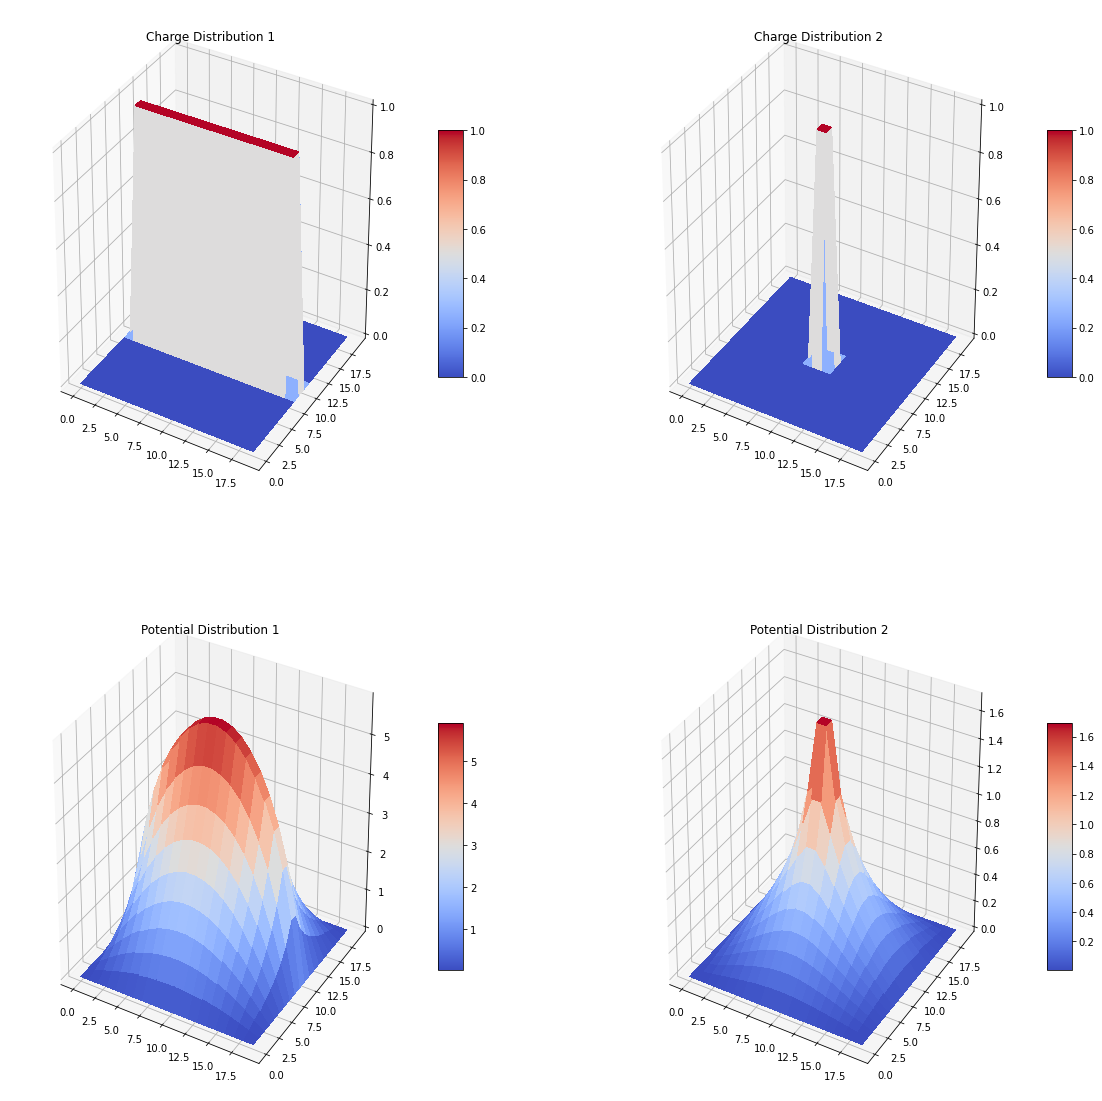

In [42]:

fig=plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(2, 2, 1, projection='3d')

X1 = np.arange(0,N)
Y1 = np.arange(0,N)
X1, Y1 = np.meshgrid(X1, Y1)
Z1 = charge_1[0:N,0:N]
surf1 = ax1.plot_surface(X1, Y1, Z1, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax1.set_title('Charge Distribution 1')
fig.colorbar(surf1, shrink=0.5, aspect=10)
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
Z2 = charge_2[0:N,0:N]
surf2 = ax2.plot_surface(X1, Y1, Z2, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax2.set_title('Charge Distribution 2')
fig.colorbar(surf2, shrink=0.5, aspect=10)

ax3 = fig.add_subplot(2, 2, 3, projection='3d')
Z3 = potential_1[0:N,0:N]
surf3 = ax3.plot_surface(X1, Y1, Z3, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax3.set_title('Potential Distribution 1')
fig.colorbar(surf3, shrink=0.5, aspect=10)

ax4 = fig.add_subplot(2, 2, 4, projection='3d')
Z4 = potential_2[0:N,0:N]
surf4 = ax4.plot_surface(X1, Y1, Z4, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax4.set_title('Potential Distribution 2')
fig.colorbar(surf4, shrink=0.5, aspect=10)

<font  face=Times color=darkblue size=3> Now we can see clearly how different charge densities result in different electric field distribution.